In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats

In [2]:
# import 02445 Datasheet.csv as a pandas dataframe
df = pd.read_csv('02445 Datasheet.csv')
# separate the first 100 rows of the dataframe into a new dataframe and the last 100 rows into another dataframe
df_m = df.iloc[:100]
df_f = df.iloc[100:]

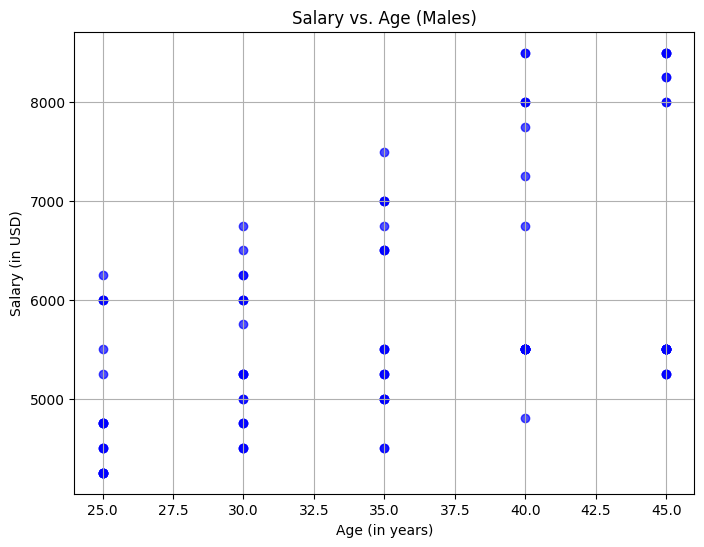

In [3]:
# make a scatter plot of mean salary vs. age for df_m
plt.figure(figsize=(8, 6))
plt.scatter(df_m['age'], df_m['mean_salary'], alpha=0.7, color='blue')
plt.title('Salary vs. Age (Males)')
plt.xlabel('Age (in years)')
plt.ylabel('Salary (in USD)')
plt.grid(True)
plt.show()

In [4]:
# Extract the mean_salary column as a list
salaries = df_m['mean_salary'].tolist()

# Number of data points
n = len(salaries)

# Calculate the mean
mean_salary = sum(salaries) / n

# Calculate the sum of squared differences from the mean
squared_diffs = [(x - mean_salary) ** 2 for x in salaries]

# Calculate the sample variance (denominator is n - 1 for unbiased estimate)
variance = sum(squared_diffs) / (n - 1)

# Calculate the standard deviation
std_dev = variance ** 0.5

print("Mean salary:", mean_salary)
print("Variance:", variance)
print("Standard Deviation:", std_dev)


Mean salary: 5818.0
Variance: 1470985.8585858585
Standard Deviation: 1212.842058384297


In [5]:
# Standardize mean_salary values (compute z-scores)
z_scores = [(x - mean_salary) / std_dev for x in salaries]

# Optional: add the z-scores as a new column in df_m
df_m = df_m.copy()  # To avoid modifying the original dataframe directly
df_m['z_score'] = z_scores


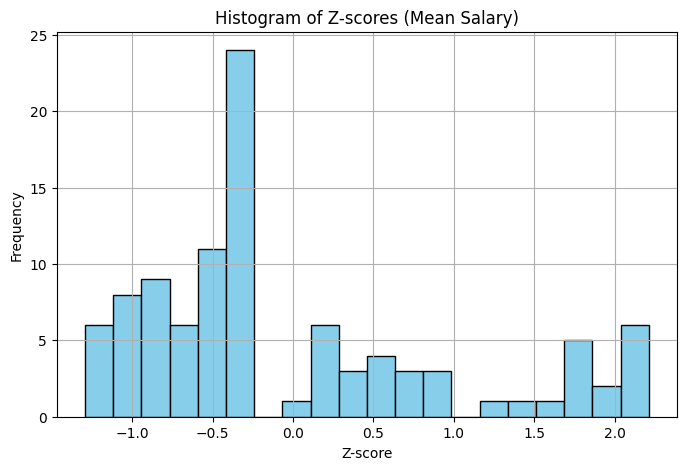

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(z_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Z-scores (Mean Salary)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


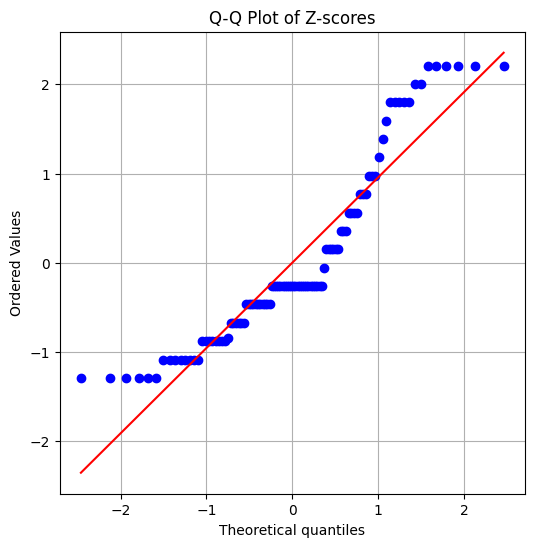

In [7]:
plt.figure(figsize=(6, 6))
stats.probplot(z_scores, dist="norm", plot=plt)
plt.title("Q-Q Plot of Z-scores")
plt.grid(True)
plt.show()

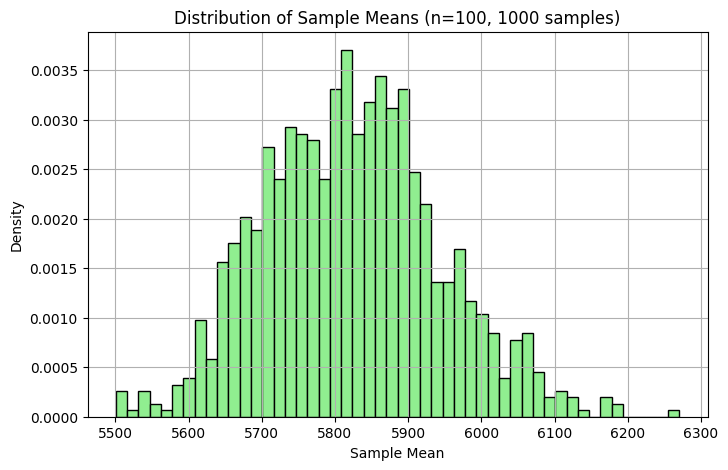

In [18]:
# Seed the random number generator for reproducibility
random.seed(0)

# Step 1: Parameters
sample_size = 100         # e.g., size of each sample (CLT kicks in nicely from n ≥ 30)
num_samples = 1000       # number of samples to draw

# Step 2: Generate the sample means
sample_means = []

for _ in range(num_samples):
    sample = random.choices(salaries, k=sample_size)  # sampling with replacement
    sample_mean = sum(sample) / sample_size
    sample_means.append(sample_mean)

# Step 3: Plot the distribution of sample means
plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=50, color='lightgreen', edgecolor='black', density=True)
plt.title(f'Distribution of Sample Means (n={sample_size}, {num_samples} samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()


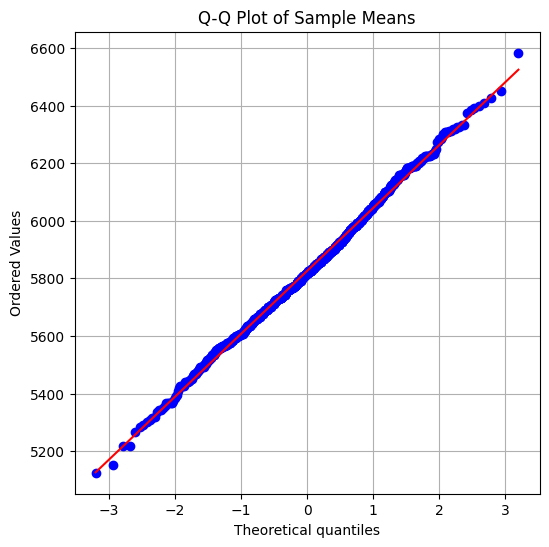

In [9]:
plt.figure(figsize=(6, 6))
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.grid(True)
plt.show()